In [1]:
import pickle

In [2]:
numbers_list = [1,2,3,4,5]

In [3]:
list_pickle_path = 'list_pickle2.pkl'

In [4]:
list_pickle = open(list_pickle_path, 'wb')

In [5]:
pickle.dump(numbers_list, list_pickle)

In [6]:
list_pickle.close()

In [7]:
#open the pkl file and use it

In [8]:
list_pickle_path = 'list_pickle2.pkl'

In [9]:
list_unpickle = open(list_pickle_path, 'rb')

In [10]:
numbers_list = pickle.load(list_unpickle)

In [11]:
print(numbers_list)

[1, 2, 3, 4, 5]


## Iris Dataset

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

import json
import pickle
import requests

In [13]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

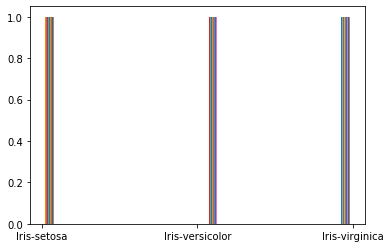

In [15]:
plt.hist(iris['Species'])
plt.show()

In [16]:
le = LabelEncoder()
le.fit(iris['Species'])

LabelEncoder()

In [17]:
iris['Species'] = le.transform(iris['Species'])

In [18]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
#features
X = iris.iloc[:,1:5]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
y = iris.iloc[:,5]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [22]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [23]:
algo = DecisionTreeClassifier()
model = algo.fit(X_train, y_train)

In [24]:
#preds
preds = model.predict(X_test)

In [25]:
#accuracy
print(accuracy_score(y_test, preds))

0.9210526315789473


In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.73      1.00      0.84         8
           2       1.00      0.79      0.88        14

    accuracy                           0.92        38
   macro avg       0.91      0.93      0.91        38
weighted avg       0.94      0.92      0.92        38



In [28]:
#pickle
pickle.dump(model, open('iris_model2.pkl', 'wb'))

In [36]:
url = "http://localhost:9000/api"

In [49]:
data = json.dumps({'SepalLengthCm': 1, 'SepalWidthCm': 3.5, 'PetalLengthCm': 1.1, 'PetalWidthCm': 1.8})

In [50]:
print(data)

{"SepalLengthCm": 1, "SepalWidthCm": 3.5, "PetalLengthCm": 1.1, "PetalWidthCm": 1.8}


In [51]:
send = requests.post(url, data)

In [52]:
print(send.json())

{'results': {'y_hat': 1}}
